
Epoch 1 / 150
0.10056515957446809

Epoch 2 / 150
0.10887632978723404

Epoch 3 / 150
0.10887632978723404

Epoch 4 / 150
0.10887632978723404

Epoch 5 / 150
0.10887632978723404

Epoch 6 / 150
0.10638297872340426

Epoch 7 / 150
0.10887632978723404

Epoch 8 / 150
0.10887632978723404

Epoch 9 / 150
0.10887632978723404

Epoch 10 / 150
0.10887632978723404

Epoch 11 / 150
0.10887632978723404

Epoch 12 / 150
0.10887632978723404

Epoch 13 / 150
0.10887632978723404

Epoch 14 / 150
0.10887632978723404

Epoch 15 / 150
0.10605053191489362

Epoch 16 / 150
0.10887632978723404

Epoch 17 / 150
0.10887632978723404

Epoch 18 / 150
0.10887632978723404

Epoch 19 / 150
0.10588430851063829

Epoch 20 / 150
0.10887632978723404

Epoch 21 / 150
0.10887632978723404

Epoch 22 / 150
0.10887632978723404

Epoch 23 / 150
0.10887632978723404

Epoch 24 / 150
0.10887632978723404

Epoch 25 / 150
0.10787898936170212

Epoch 26 / 150
0.1077127659574468

Epoch 27 / 150
0.10887632978723404

Epoch 28 / 150
0.10887632978723404

E

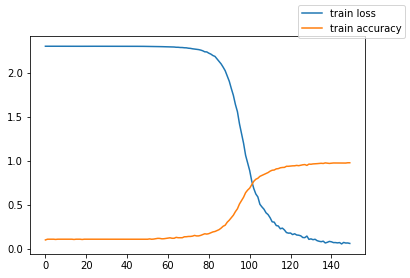

In [6]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

import numpy as np
import time
import matplotlib.pyplot as plt
# Make sure to use only 10% of the available MNIST data.
# Otherwise, experiment will take quite long (around 90 minutes).

# Prepare data
trainset = datasets.MNIST(root = './mnist_data/', train=True, transform = transforms.ToTensor(),download=True)
# random label
n = len(trainset)
trainset.targets = torch.randint(0,10,(n,) )
# use only 10%
idx = np.random.permutation(np.arange(n))[:int(n/10)]
trainset.data = trainset.data[idx]
trainset.targets = trainset.targets[idx]

# (Modified version of AlexNet)
class AlexNet(nn.Module):
    def __init__(self, num_class=10):
        super(AlexNet, self).__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(96, 96, kernel_size=3),
            nn.ReLU(inplace=True)
        )
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.fc_layer1 = nn.Sequential(
            nn.Dropout(),
            nn.Linear(6400, 800),
            nn.ReLU(inplace=True),
            nn.Linear(800, 10)
        )

    def forward(self, x):
        output = self.conv_layer1(x)
        output = self.conv_layer2(output)
        output = self.conv_layer3(output)
        output = torch.flatten(output, 1)
        output = self.fc_layer1(output)
        return output


learning_rate = 0.1
batch_size = 64
epochs = 150

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_loss = []
train_accuracy = []
train_loader = DataLoader(dataset = trainset, batch_size = batch_size, shuffle = True)


tick = time.time()
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1} / {epochs}")
    total =0
    correct =0
    lossval =0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
        
        lossval += loss.item()
        total+=1
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        
    train_loss.append(lossval/total)
    train_accuracy.append(correct/total/batch_size)
    print(train_accuracy[-1])

tock = time.time()
print(f"Total training time: {tock - tick}")

#plot
xaxis = [i for i in range(epochs)]
fig = plt.figure()
plt.plot(xaxis, train_loss, label='train loss')
plt.plot(xaxis, train_accuracy, label='train accuracy')
fig.legend()
plt.show()